In [ ]:
https://www.relataly.com/stock-market-correlation-matrix-in-python/103/

In [ ]:
# GLD, XLE, TLT, UNG

In [ ]:
pip install yfinance

In [ ]:
# Setup Pakages
import pandas as pd
import pandas_datareader as web
import numpy as np
from datetime import datetime
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib as matplot
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import requests
import json
from pandas.plotting import register_matplotlib_converters
from pandas_datareader import data as pdr
import matplotlib as mpl

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

In [ ]:


# Load second Dataset with Corona Cases
payload = {"code": "ALL"}
URL = "https://api.statworx.com/covid"
response = requests.post(url=URL, data=json.dumps(payload))
df_covid = pd.DataFrame.from_dict(json.loads(response.text))
# df_covid = df_covid[df_covid['code'] == 'US']

# add the date column as variable
df_covid["Date"] = pd.to_datetime(df_covid["date"])

# delete some columns that we won't use
df_covid.drop(
    ["day", "month", "year", "country", "code", "population", "date"],
    axis=1,
    inplace=True,
)

# Summarize cases over all countries
df_covid = df_covid.groupby(["Date"]).sum()
df_covid

,cases,deaths,cases_cum,deaths_cum
Date,,,,
2019-12-31,27,0,27,0
2020-01-01,0,0,27,0
2020-01-02,0,0,27,0
2020-01-03,17,0,44,0
2020-01-04,0,0,44,0
...,...,...,...,...
2020-12-10,676114,12376,68985346,1570805
2020-12-11,693352,12327,69678698,1583132
2020-12-12,657140,12355,70335838,1595487


In [ ]:
df_covid_new = df_covid.copy()

# Read the data for different assets
today_date = datetime.today().strftime("%Y-%m-%d")
start_date = "2020-01-01"
asset_dict = {
    "^GSPC": "SP500",
    "DAX": "DAX",
    "^N225": "N225",
    "ES=F": "SP500FutJune20",
    "LHA.DE": "Lufthansa",
    "AAL": "AmericanAirlines",
    "NFLX": "Netflix",
    "AMZN": "Amazon",
    "AAPL": "Apple",
    "MSFT": "Microsoft",
    "GOOG": "Google",
    "BTC-USD": "BTCUSD",
    "ETH-USD": "ETHUSD",
    "CL=F": "Oil",
    "GC=F": "Gold",
    #"SM=F": "Soybean",
    "ZB=F": "UsTreasuryBond",
    "GBPEUR=X": "GBPEUR",
    "EURUSD=X": "EURUSD",
    "CHFEUR=X": "CHFEUR",
    "GBPUSD=X": "GBPUSD"}

col_list = []
# Join the dataframes
for key, value in asset_dict.items():
    print(key, value)    
    try:
        df_temp = pdr.get_data_yahoo(
            key, start=start_date, end=today_date)
    except ValueError: 
        print(f' {key} symbol not found')
    # convert index to Date Format
    df_temp.index = pd.to_datetime(df_temp.index) 
    df_temp.rename(columns={"Close": value}, inplace=True) # Rename Close Column       
    df_covid_new = pd.merge(
        left=df_covid_new,
        right=df_temp[value],
        how="inner",
        left_index=True, right_index=True)     

df_covid_new.head()

SPY SPY
[*********************100%***********************]  1 of 1 completed
TLT TLT
[*********************100%***********************]  1 of 1 completed
XLE XLE
[*********************100%***********************]  1 of 1 completed
FCEL FCEL
[*********************100%***********************]  1 of 1 completed
IWM IWM
[*********************100%***********************]  1 of 1 completed
EEM EEM
[*********************100%***********************]  1 of 1 completed
GDX GDX
[*********************100%***********************]  1 of 1 completed
FXI FXI
[*********************100%***********************]  1 of 1 completed
SLV SLV
[*********************100%***********************]  1 of 1 completed
EWZ EWZ
[*********************100%***********************]  1 of 1 completed
KWEB KWEB
[*********************100%***********************]  1 of 1 completed
XLF XLF
[*********************100%***********************]  1 of 1 completed
EFA EFA
[*********************100%***********************]  1 of 1 compl

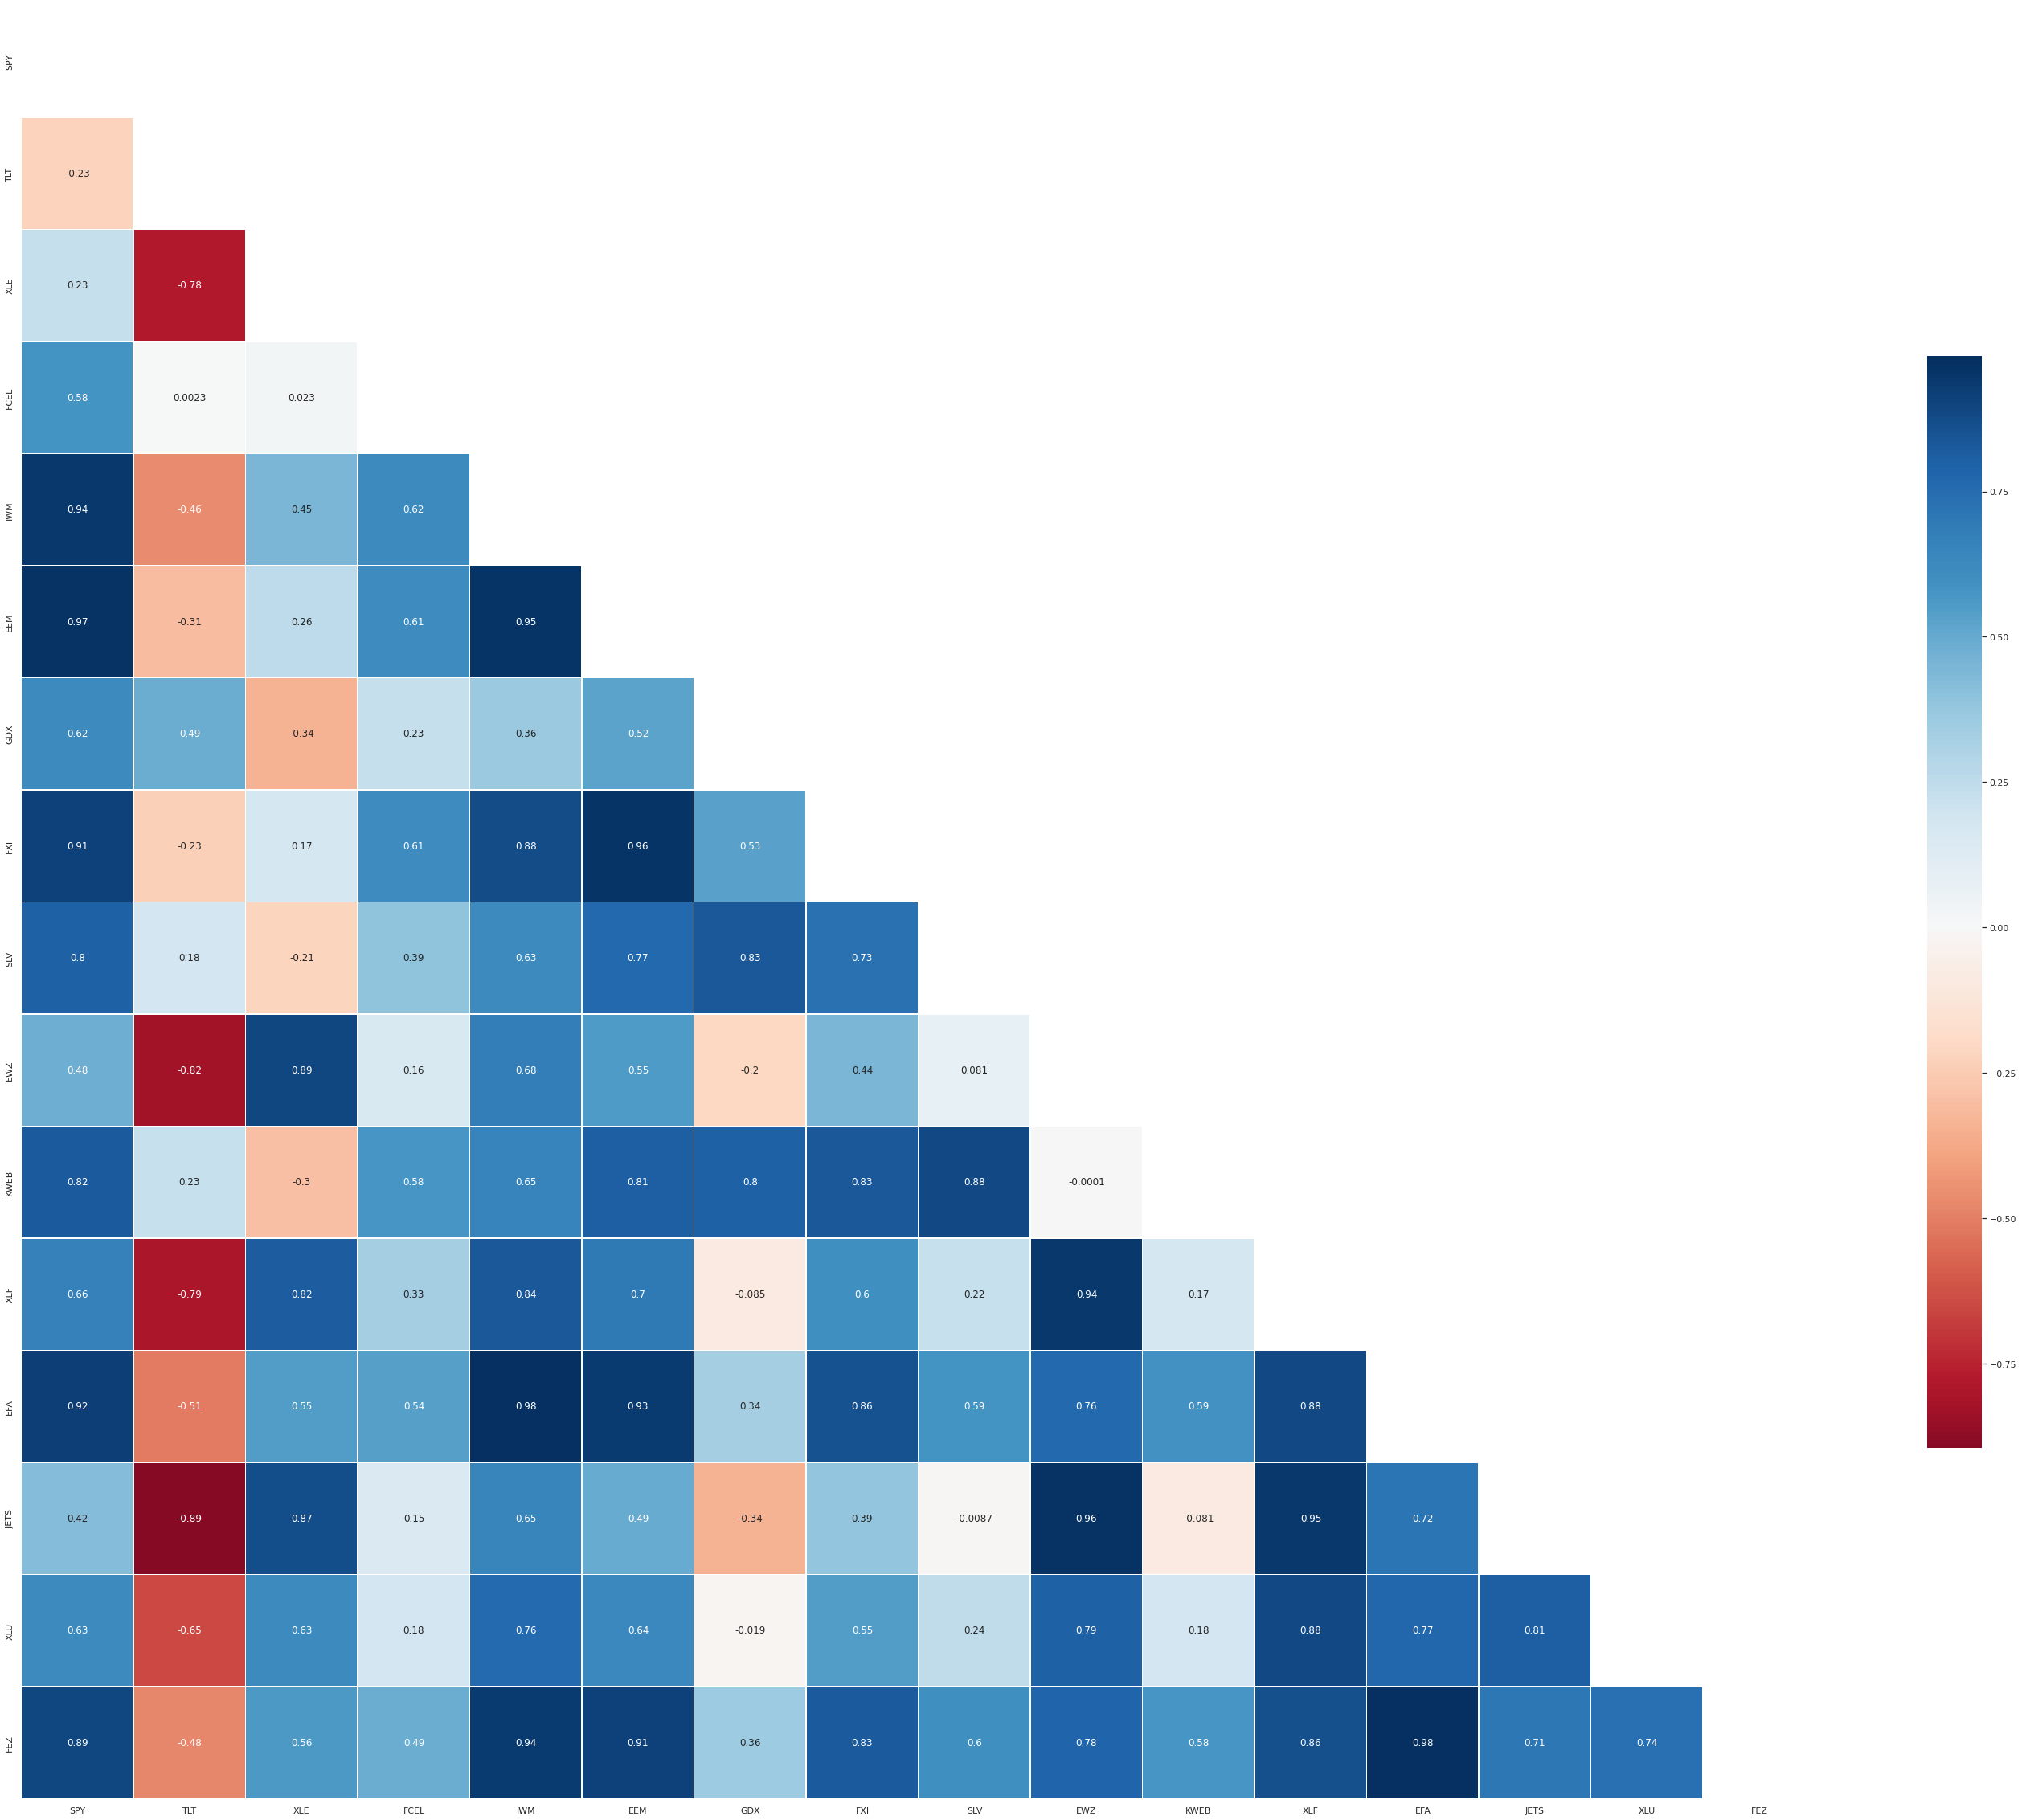

In [ ]:
df_covid_new = df_covid.copy()

# Read the data for different assets
today_date = datetime.today().strftime("%Y-%m-%d")
start_date = "2015-01-01"
asset_dict = {
    'SPY': 'SPY',
    'TLT': 'TLT',
    'XLE': 'XLE',
    'FCEL': 'FCEL',
    'IWM': 'IWM',
    'EEM': 'EEM',
    'GDX': 'GDX',
    'FXI': 'FXI',
    'SLV': 'SLV',
    'EWZ': 'EWZ',
    'KWEB': 'KWEB',
    'XLF': 'XLF',
    'EFA': 'EFA',
    'JETS': 'JETS',
    'XLU': 'XLU',
    'FEZ': 'FEZ',
              }

col_list = []
# Join the dataframes
for key, value in asset_dict.items():
    print(key, value)    
    try:
        df_temp = pdr.get_data_yahoo(
            key, start=start_date, end=today_date)
    except ValueError: 
        print(f' {key} symbol not found')
    # convert index to Date Format
    df_temp.index = pd.to_datetime(df_temp.index) 
    df_temp.rename(columns={"Close": value}, inplace=True) # Rename Close Column       
    df_covid_new = pd.merge(
        left=df_covid_new,
        right=df_temp[value],
        how="inner",
        left_index=True, right_index=True)     

df_covid_new.head()

# delete some columns that we won't use
df_covid_new.drop(
              ["cases", "deaths", "cases_cum", "deaths_cum"],
              axis=1,
              inplace=True,
          )

# Plotting a diagonal correlation matrix
sns.set(style="white")

# Compute the correlation matrix
df = pd.DataFrame(df_covid_new, columns=col_list)
corr = df_covid_new.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(50, 50))

# Generate a custom diverging colormap
cmap = "RdBu"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    annot=True,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

In [ ]:
# delete some columns that we won't use
df_covid_new.drop(
              ["cases", "deaths", "cases_cum", "deaths_cum"],
              axis=1,
              inplace=True,
          )

In [ ]:
# # Plot line charts
# df_plot = df_covid_new.copy()

# list_length = df_plot.shape[1]
# ncols = 4
# nrows = int(round(list_length / ncols, 0))

# fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, figsize=(14, 18))
# fig.subplots_adjust(hspace=0.5, wspace=0.5)
# for i in range(0, list_length):
#         ax = plt.subplot(nrows,ncols,i+1)
#         sns.lineplot(data = df_plot.iloc[:, i], ax=ax)
#         ax.set_title(df_plot.columns[i])
#         ax.tick_params(axis="x", rotation=30, labelsize=10, length=0)
#         ax.xaxis.set_major_locator(mdates.AutoDateLocator())
# fig.tight_layout()
# plt.show()

In [ ]:
# Plotting a diagonal correlation matrix
sns.set(style="white")

# Compute the correlation matrix
df = pd.DataFrame(df_covid_new, columns=col_list)
corr = df_covid_new.corr()
corr

,TLT,SPY,BABA,SLV
TLT,1.000000,-0.229318,0.141597,0.179426
SPY,-0.229318,1.000000,0.779873,0.804822
BABA,0.141597,0.779873,1.000000,0.885065
SLV,0.179426,0.804822,0.885065,1.000000


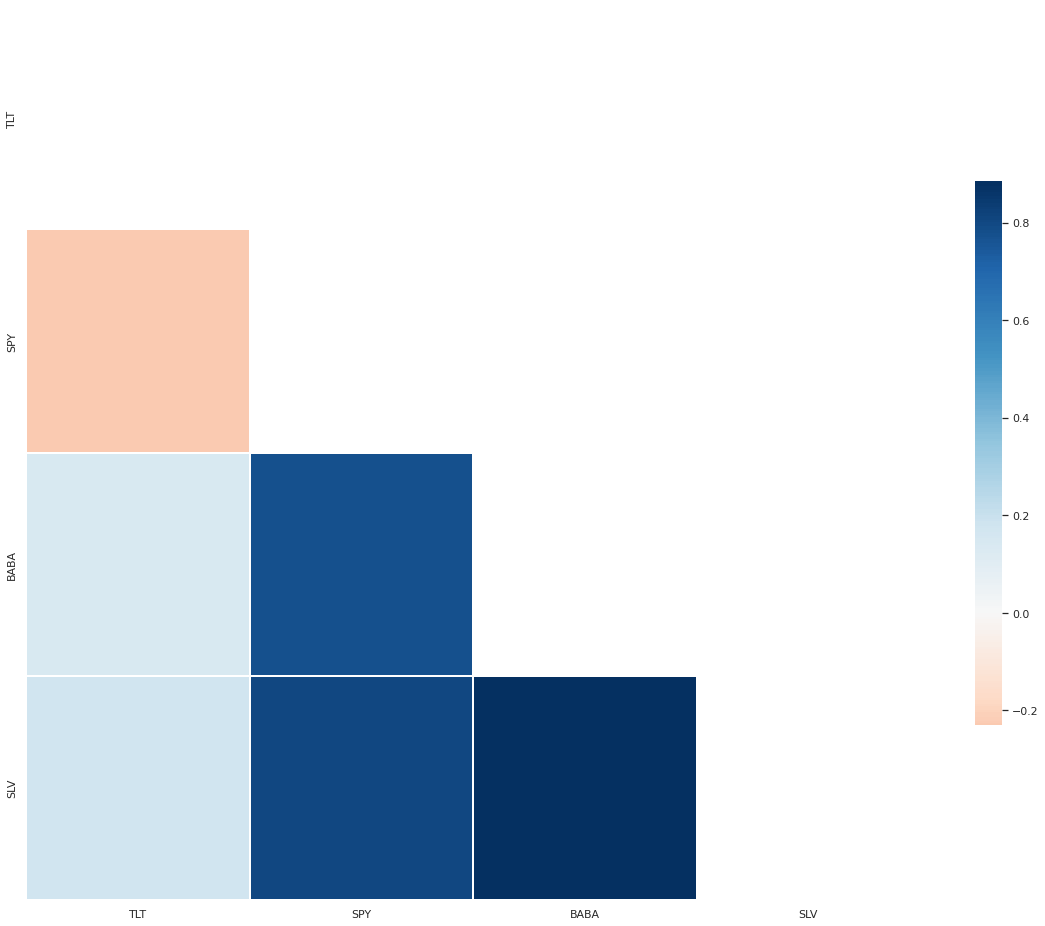

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = "RdBu"

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

In [ ]:
fig = mpl.pyplot.gcf()
fig.set_size_inches(18.5, 10.5, forward=True)
fig.savefig('test2png.png', dpi=100)

<Figure size 1332x756 with 0 Axes>